<a id='top'></a>

# CSCI 3202: Intro to AI - Fall 2020 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday November 2**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distributions or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.  We will happily discuss ideas on your paper, however.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Connor Ely

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The practicum is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Short Paper](#p2) | [Bottom](#bot)

---

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [50 points] Part 1: The Traveling Salesman

Run the following cell to generate the data set, which is saved in the `df` dataframe by default.  You may change it to a dictionary/matrix/whatever typing you see fit.  The x and y axis are in miles, and you may assume that any pairwise distances computed are Euclidean distance

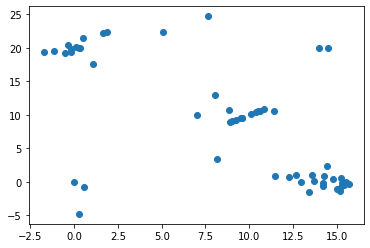

In [59]:
np.random.seed(3202)

d=np.random.multivariate_normal([14,0], [[1,0],[0,1]],20)
d2=np.random.multivariate_normal([0,20], [[1,.8],[.8,1]],12)
d3=np.random.multivariate_normal([10,10], [[1,1],[1,1]],12)
d4=[[14,20], [0,0], [7,10]]
d5={'x': np.random.random(size=10)*(20)-3, 'y': np.random.random(size=10)*30-5}
df=pd.DataFrame(data=d, columns=['x','y'])
df = df.append(pd.DataFrame(data=d2, columns=['x','y']))
df = df.append(pd.DataFrame(data=d3, columns=['x','y']))
df = df.append(pd.DataFrame(data=d4, columns=['x','y']))
df = df.append(pd.DataFrame(data=d5, columns=['x','y']))
plt.scatter(df['x'],df['y'])

### Part A) Warmup: Rehash on A*

Turn the set of points into a graph by adding edges.  For each point, add two edges that connect that point two the nearest two other points.  Note that some points might end up with more than 3 edges, but many edges won't have to be added because nearest-other-points will often be symmetric.  After doing this, perform the $A^*$ algorithm to find the shortest path from the point at (0,0) to the point at (14,20).  Print out the path followed (as a list of coordinate pairs) and the total Euclidean distance.

Note: you probably want:
    - i) a quick function or dictionary or matrix that stores or computes the distances between two input points
    - ii) a function that computes the total distance of a path: given a list of nodes/vertices, uses the i) function to compute it's total edge cost

In [176]:
#add edges
#create edge dictionary?
#create path function?
def distance(point1, point2):
    return np.sqrt(((point1[0] - point2[0])**2) + ((point1[1] - point2[1])**2))

def totalDistance(path):
    dist = 0
    for i in range(len(path) - 1):
        dist += distance(path[i], path[i + 1])
    return dist

### Part B) Annealing: the Salesman

In this exercise, we're going to be using simulated annealing to find solutions to the traveling salesman problem.Your two helper functions in part A should help!

In this problem, we model a salesman that tries to "reach" each city on the graph to sell their wares.  As an algorithm, the goal of the traveling salesman problem is to find the path that:
    - has the lowest total edge length (or path cost)
    - hits each and every vertex/node exactly once
    - the salesman may travel directly between *any* two cities (you will need more edges than you constructed in part A!)

We will use simulated annealing.  This means you need to come up with both a temperature function and a probability of acceptance function.  There is no guidance on these functions beyond:
    - Given a path or solution to the problem, the temperature function proposes a new solution.
    The new solutions should become more and more like the input solutions over time/as you run more iterations
    - Given two solutions, the annealing algorithm will always accept one with a shorter path cost, and will have some probability that scales with temperature/iterations and becomes less and less likely to accept a new solution with longer path cost.
    - All proposed solutions should pass through every node.
    - There are many methods to "adjust" old solutions to propose new ones.  You should consider moving a single node to another location in the list, moving entire substrings to other locations, reversing the order of substrings, etc.
    
For any temperature/probability function pair, make sure you run annealing for sufficiently different initial conditions to generate a small sample of "final solution lengths" and "number of iterations."

Typeset and describe in exact detail how you chose and implemented temperature and probability functions in the markdown cell below.


For my implementation, I implemented two sets of schedule and probability functions. One of the sets is the one Zach provided us in `CSCI 3202_HillClimbing_SimulatedAnnealing_Solutions`. I also made my own set of functions. I tried to alter the C and p values to make my function less likely to accept worse paths quicker, to see what effect that had on my solutions. In terms of the probability function, I just divided the `exp` call by two, which in essence just shifts the curve to the right if we were looking at it graphically. You could greatly vary the schedule and probability functions by changing the C and/or p values, or by going for a different setup entriely. I kept the `exp` aspect of the probability due to the nature of its change over time meaning that solutions are accepted with lower and lower probability over time. You could also vary path randomization using some of the suggestions above, namely moving single nodes or entire substrings to different locations. You could also change how different proposed solutions are over time. For example, reversing substrings of less and less length over time, or moving substrings of less and less length to random places. This could help you to zero in on a solution, or it could conversely get you stuck in a local minimum easier. Below I have included the average path length of 10 runs of three combinations of functions each: one of my functions, one of Zach's, and one of one function each.

### Part C) Annealing Implementation

In [193]:
##Code cell: implement annealing!  Include any trial runs for different temperature/prob functions.
def zach_schedule_function(time):
    '''some sort of mapping from time to temperature, to represent how we should be 
    "cooling off" - that is, accepting wacky solutions with lower and lower probability'''
    C = 20
    p = 0.7
    temperature = C/(time+1)**p
    return temperature
def connor_schedule_function(time):
    C = 10
    p = 0.9
    temperature = C/(time+1)**p
    return temperature
def zach_probability_function(ratio):
    return np.exp(ratio)
def connor_probability_function(ratio):
    return (np.exp(ratio)/2)
def reverse(path): #function to reverse a sustring of length 6 in a random position
    path_copy = path.copy()
    start = np.random.randint(len(path) - 6)
    for i in range(3):
        j = (path[start + i])
        k = (path[(start + 5) - i])
        (path_copy[start + i], path_copy[(start + 5) - i]) = (k, j) # Start at the ends of the segment and swap pairs of cities, moving towards the center.
    return(path_copy)

In [197]:
# ACTUAL ANNEALING BELOW ################################################################
P = []
for index, row in df.iterrows():
    P.append([row['x'], row['y']]) #making an array of just the x and y coordinates of each city
def anneal(all_nodes, schedule_function, probability_function, num_iterations):
    current_path = all_nodes #initial_path is their order in the dataframe for this case, but could be however they are passed in
    for t in range(num_iterations):
        temp = schedule_function(t)
        new_path = reverse(current_path) #suggested path is passed through the reverse function defined above
        delta_obj = totalDistance(current_path) - totalDistance(new_path)
        if delta_obj > 0:
            best_path, best_path_cost = new_path, totalDistance(new_path)
            current_path = new_path
        else:
            p_accept = probability_function(delta_obj/temp) #using the same temperature
            accept = np.random.choice([True, False], p=[p_accept, 1-p_accept])
            if accept:
                best_path, best_path_cost = new_path, totalDistance(new_path)
                current_path = new_path
    return best_path, best_path_cost
my_functions_results = []
zach_functions_results = []
mixture_results = []
for i in range(10):
    my_functions_results.append(anneal(P, connor_schedule_function, connor_probability_function, 10000)[1])
    zach_functions_results.append(anneal(P, zach_schedule_function, zach_probability_function, 10000)[1])
    mixture_results.append(anneal(P, connor_schedule_function, zach_probability_function, 10000)[1])
print("Average using my functions:", np.mean(my_functions_results))
print("Average using Zach's functions:", np.mean(zach_functions_results))
print("Average using a mixture of functions:", np.mean(mixture_results))

Average using my functions: 209.4600919561604
Average using Zach's functions: 179.73566393469034
Average using a mixture of functions: 210.11403766698209


##### Part D) Conclusions
Create a visualization - box plots, line graphs, histograms, etc. of how your temperature/probability functions performed. Which one did best?  Plot the path corresponding to the shortest edge length that you found, and state its path length.  How many iterations were necessary *on average* for the temperature/probability pair that gave you your shortest edge length?

Shortest path length: 181.97704669605207


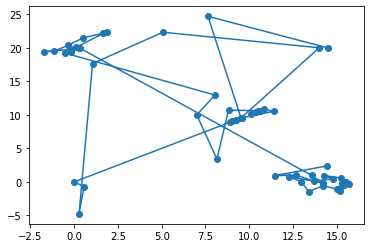

In [196]:
#visualization of success times/paths of different implementations, plot of shortest path found
result = anneal(P, zach_schedule_function, zach_probability_function, 10000)
print("Shortest path length:", result[1])
plt.scatter(df['x'],df['y'])
x = []
y = []
for each in result[0]:
    x.append(each[0])
    y.append(each[1])
plt.plot(x,y)

Unsuprisingly, Zach's functions did the best (after all, he *is* the professor...) and it is plotted above. On average it took around 10,000 iterations to get to a good final path cost number for each of the functions. Less than this and the length varied too much.

### Part E) Short Bonus (5 pts)

Suppose there existed a river that was very difficult to cross running along the line $x=10$ on the data set.  Adjust your edge costs so that any edge that cross this river has an added incurred cost equivalent to traveling an *additional* 10 miles.  Use your winning algorithm in Parts C/D to solve ths problem again, and as before plot the shortest path found and list its cost (distance plus any river crossings).

<br>

---
[Back to top](#top)
<a id='p2'></a>

## [50 points] Part 2: A Short Paper on Ethics and AI

Your task is to find a current event, project, or issue that relates to AI, and evaluate the ethics involved. You
must consider multiple points of view, not just your own as well as the implications that come from these points of
view.

We mentioned various ethical scenarios in class that can help you to consider your analysis. Remember in much of AI,
context is king. This can be the case in ethics also.  You may want to think about e.g. describing the types of competing loss/utility evaluations that might lead to different AI actions in the issue you choose.  You should also read about the 5 pillars of ethical standards here: https://www.scu.edu/ethics/ethics-resources/ethical-decision-making/a-framework-for-ethical-decision-making/

Consider the effects and impacts of AI on everyday life. Some examples to consider:
- AI and Justice
- AI and Medicine
- AI and Civil Rights
- AI and Warfare
- Defining AI
- AI Regulation
- AI and Human Jobs
- AI and Privacy
- Fair AI
- AI and Misinformation

You are welcome to discuss another topic providing there is enough AI content to make it relevant.

As the word continually transitions and modernizes into the future, concerns surrounding the ethics of many of humanity’s frontiers have been raised by some of the world’s smartest minds. One such field around which many doubts have been voiced is the field of artificial intelligence or AI. Few would argue that artificial intelligence cannot be a great tool for society if used properly. The key to making AI a useful tool in the future is regulating and monitoring usage, however this task is easier said than done. Regulating artificial intelligence will require enough freedom for technological advancements, but enough regulations to keep society at large safe and comfortable with the technology around them. <br>
	For the average citizen, their current interactions with the type of AI we generally tend to think of when we hear the term are few and far between. Few Americans have intelligent robots or self driving cars in their house or garage for example. The majority of an average citizen’s encounters come from hidden software that we tend to forget, things as common as predictive text features on a smartphone. For this reason, many of the issues everyday citizens will be facing regarding AI will have to deal with security and privacy of data. Common forms of AI that deal with personal privacy of data are facial recognition, email categorization, and predictive text [1, 4]. AI was chosen to accomplish these tasks since it would make them simpler and easier on the user than doing them without artificial intelligence. For example, facial recognition has simplified the routine task of unlocking your phone. The ability to unlock your new iPhone just by looking at it simplifies a process that before required the actual touch of a finger or even worse, the typing of a passcode. Email services can categorize emails for us, and predictive text makes it easier to text in a hurry. Humans can accomplish every one of these tasks, but AI was chosen in order to accelerate and simplify the task for the user. <br>
	Despite each of the above tasks being simplified with the use of artificial intelligence, there are unavoidable concerns surrounding the data made available to the AI during the course of completing the tasks. The general public always wants their data to be secure, yet in order for AI to work to the best of its ability, the system needs large amounts of quality data [1]. This means private data and information may be vulnerable to leaks if there is a problem with the artificial intelligence system. One possible solution to combat such a problem would be to regulate the use of AI. Many federal agencies such as the FDA and the EPA enact the majority of public policy put into law in the United States today, due in large part to the fact that full-time policy makers work in these agencies [4]. Many high profile executives in the tech industry such as Sundar Pichai and Elon Musk have even expressed a firm desire for there to be a government agency dealing solely with the regulation of artificial intelligence [4, 2]. With that being said, establishing a strict set of national or even worldwide regulations on AI is much simpler on paper than it would be in reality. Regulations around the world may look very different from continent to continent and even country to country. Policy makers around the world need to know about the goals and needs of AI around the world, as this may differ greatly from country to country [1]. <br>
	Another big factor in the question of AI regulations is the question of ethics. The main argument against the regulation of artificial intelligence is that AI is not currently at a point where it needs to be regulated, and the resources required would outweigh the benefit at the current moment [3]. This is less of an argument against restrictions themselves, but more of an argument against them right now. In general, it is agreed among scholars that AI needs regulation in the future, however it is hard to solidify these restrictions at the moment [3]. Using the five sources of ethical standards [5], we are able to see some of the reasons why many scholars agree on the matter. Using the utilitarian approach, the outcome that provides the greatest amount of good over harm would be a case where regulations on AI limit the amount of harm that can be done. One may argue that by limiting the bad that can be done we must also limit the good that can be done. This might be true, but well-defined restrictions in the future will be formed with the goal of only restricting harmful uses of AI. When taking the rights approach into mind, limiting AI results in the greatest amount of personal freedom. According to the rights approach, one has a right to personal privacy and freedom, things that as discussed above could be compromised by unregulated AI. Using the fairness or justice approach, AI should not be regulated. The better the system is, the more it should be able to accomplish, without limitations. There should be no penalty for being better at extracting personal information, for example. While taking the common good approach into account, AI should be regulated as to preserve the common good of society. AI that can do major damage such as a mass-killing machine needs to be regulated for the common good of society. Lastly, looking at the virtue approach, AI regulations should be put in place in certain situations. Acting to the highest potential of our character would not be harming others on a large scale, and thus AI built with such a goal in mind should be restricted. Using the five pillars of ethical standards, we can conclude that AI should be regulated in cases that would cause great harm to society and its members, but left alone when it helps society to reach its full potential or furthers our general understanding. <br>
	Whether the governments and leaders of the world decide to regulate artificial intelligence or not, the decision will have a lasting impact on the future of humanity. Unregulated AI could reach its full potential, in both good and malicious uses. The benefits would be maximized, no matter what the end goal of the AI is. It would not be surprising to me to see this debate over whether AI should be regulated and the ethical debate behind it discussed above come to the forefront of policy makers’ minds in the decades to come. In general, I would say that this debate over whether artificial intelligence should be restricted is fairly representative. It is an increasingly common debate that I saw many articles on in my research for this paper. I believe such debates will only become more prevalent as AI expands and improves in the future, and I believe that artificial intelligence should be regulated. For the most part, artificial intelligence is used solely for good in the world, but it only takes one case of AI being used for malice to cause a real tragedy. If we are not careful, artificial intelligence may surpass human intelligence by a vast margain, and may be able to perform unintended tasks with very grave consequences.


[1]Kathleen Walch. 2020. This Is The Year Of AI Regulations. (March 2020). Retrieved November 12, 2020 from https://www.forbes.com/sites/cognitiveworld/2020/03/01/this-is-the-year-of-ai-regulations/?sh=4934c23e7a81 <br>
[2]Lex Fridman. 2019. Elon Musk: Regulation of AI Safety, YouTube. <br>
[3]Oren Etzioni Amitai Etzioni. 2020. Should Artificial Intelligence Be Regulated? (February 2020). Retrieved November 12, 2020 from https://issues.org/perspective-should-artificial-intelligence-be-regulated/ <br> 
[4]Rob Toews. 2020. Here Is How The United States Should Regulate Artificial Intelligence. (September 2020). Retrieved November 12, 2020 from https://www.forbes.com/sites/robtoews/2020/06/28/here-is-how-the-united-states-should-regulate-artificial-intelligence/?sh=56b9174e7821 <br>
[5]Santa Clara University. 2015. A Framework for Ethical Decision Making. (August 2015). Retrieved November 12, 2020 from https://www.scu.edu/ethics/ethics-resources/ethical-decision-making/a-framework-for-ethical-decision-making/ <br>

## Technical Details

Your paper should be approximately 1000 - 1500 words.

You will then need to collect sources surrounding this scenario. These can be newspaper articles, blog posts, book chapters etc. It is always good to have more than one source, now more than ever. You are free to choose your topic around what interests you, but I recommend that you read the grading rubric
below before making a final choice. Make sure you choose a topic on which you can write a paper to earn maximum
points.

I expect this assignment to use references appropriately and all references should be in the ACM Format (see:https://www.acm.org/publications/authors/reference-formatting).

For your consideration: preliminary rubric

- (a) [10 pts] Summarize your scenario. What is the problem that is being solved and what is the method used to solve it. This should include references to where you read about it. There maybe multiple articles on the same topic saying different things, you may wish to discuss both.
- (b) [6 pts] Describe the AI involved. Why was AI the solution? Is there a human solution? If so, why was the AI solution used.
- (c) [14 pts] Discuss the Ethical considerations of this scenario. If there is more than one side to the argument you should consider them all. (For almost all studies there will be multiple viewpoints). I recommend using the moral frameworks discussed in class to break down the scenario, either through analysing Moral Intensity of the five aspects of the Markkula Framework.
- (d) [6 pts] Discuss the Implications of this case study. How do the actions taken impact the future? What ethical debate can you forsee in the future?
- (e) [6 pts] Discuss how this case study relates to Ethics in AI as a whole. Is this case study representative? atypical? Somewhere in the middle? Why?
- (f) [4 pts] Conclude your paper, there should be a take home message. If you wish to include a personal opinion, this is the section in which to do that
There will also be points for:
- (g) [2 pt] Presentation, Spelling and Grammar
- (h) [2 pt] Appropriate Referencing

<br>

---
[Back to top](#top)
<a id='bot'></a>